<a href="https://colab.research.google.com/github/him01/Azure-cloud-project/blob/main/Bank_Neural_Network_Churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bank Churn Prediction

In [3]:
import pandas as pd

In [4]:
df =pd.read_csv('Bank Customer Churn Prediction.csv')

In [5]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.shape

(10000, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [8]:
df.duplicated().sum()

0

In [9]:
df['churn'].value_counts()

,count
churn,
0,7963
1,2037


In [10]:
df['country'].value_counts()

,count
country,
France,5014
Germany,2509
Spain,2477


In [11]:
df['gender'].value_counts()

,count
gender,
Male,5457
Female,4543


In [12]:
df.drop(columns=['customer_id'],inplace=True)

In [13]:
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
df=pd.get_dummies(df,columns=['country','gender'],drop_first=True)

In [15]:
df

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain,gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [16]:
X= df.drop(columns=['churn'])
y=df['churn']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [17]:
X_train.shape

(8000, 11)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

In [19]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [20]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [22]:
# model=Sequential()
# model.add(Dense(3,activation='sigmoid',input_dim=11))
# model.add(Dense(1,activation='sigmoid'))

model=Sequential()
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [23]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [25]:
history=model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7706 - loss: 0.5367 - val_accuracy: 0.8050 - val_loss: 0.4548
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8108 - loss: 0.4398 - val_accuracy: 0.8100 - val_loss: 0.4351
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8176 - loss: 0.4297 - val_accuracy: 0.8081 - val_loss: 0.4245
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8171 - loss: 0.4312 - val_accuracy: 0.8125 - val_loss: 0.4149
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8310 - loss: 0.4049 - val_accuracy: 0.8219 - val_loss: 0.4033
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8341 - loss: 0.4010 - val_accuracy: 0.8294 - val_loss: 0.3919
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8524 - loss: 0.3813 - val_accuracy: 0.8394 - val_loss: 0.3768
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8562 - loss: 0.3642 - val_accu

In [27]:
model.layers[2].get_weights()

[array([[-0.75721896],
        [-0.6523733 ],
        [-0.92051435],
        [ 0.94151   ],
        [-0.8769534 ],
        [ 0.9451607 ],
        [ 1.4084423 ],
        [-0.7223226 ],
        [-0.2991937 ],
        [ 1.2035174 ],
        [-0.3524573 ]], dtype=float32),
 array([-0.01469074], dtype=float32)]

In [28]:
model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[0.02086997],
       [0.09158718],
       [0.04630618],
       ...,
       [0.00941552],
       [0.06744802],
       [0.34799534]], dtype=float32)

In [29]:
y_log= model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [30]:
import numpy as np
y_pred=np.where(y_log>0.5,1,0)

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.863

In [32]:
import matplotlib.pyplot as plt

In [33]:
history.history

{'accuracy': [0.7915624976158142,
  0.8106250166893005,
  0.8204687237739563,
  0.8259375095367432,
  0.8342187404632568,
  0.8420312404632568,
  0.8478124737739563,
  0.8528125286102295,
  0.856249988079071,
  0.8557812571525574,
  0.8578125238418579,
  0.858593761920929,
  0.8595312237739563,
  0.858593761920929,
  0.8590624928474426,
  0.8612499833106995,
  0.858593761920929,
  0.8614062666893005,
  0.8609374761581421,
  0.8614062666893005,
  0.8606250286102295,
  0.864062488079071,
  0.8615624904632568,
  0.8618749976158142,
  0.8646875023841858,
  0.8646875023841858,
  0.8626562356948853,
  0.8631250262260437,
  0.8634374737739563,
  0.8634374737739563,
  0.8626562356948853,
  0.8634374737739563,
  0.8628125190734863,
  0.86328125,
  0.8639062643051147,
  0.864062488079071,
  0.8650000095367432,
  0.8648437261581421,
  0.8645312786102295,
  0.8662499785423279,
  0.8653125166893005,
  0.8656250238418579,
  0.8660937547683716,
  0.866406261920929,
  0.8650000095367432,
  0.867031276

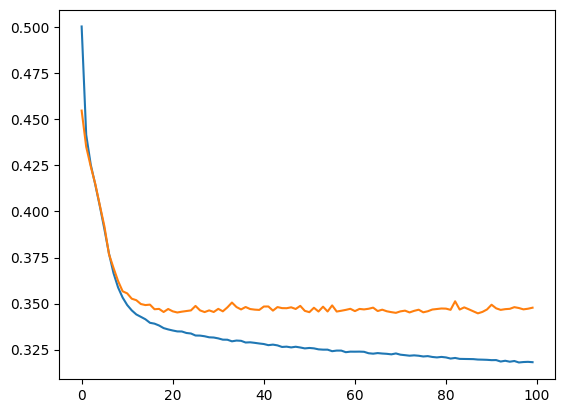

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

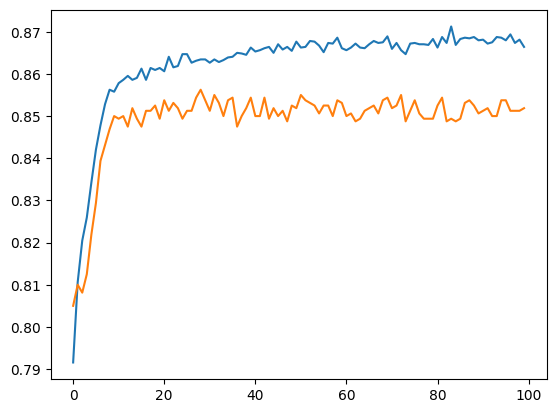

In [35]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [ ]:
# for overfititng of data use regularization or drop out